In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('income.csv')
print(df.head())
print("Total length of Dataframe:",len(df))

      Name  Age  Income($)
0      Rob   27      70000
1  Michael   29      90000
2    Mohan   29      61000
3   Ismail   28      60000
4     Kory   42     150000
Total length of Dataframe: 22


Plotting(Age,Income) using scatter plot 

<Figure size 700x700 with 0 Axes>

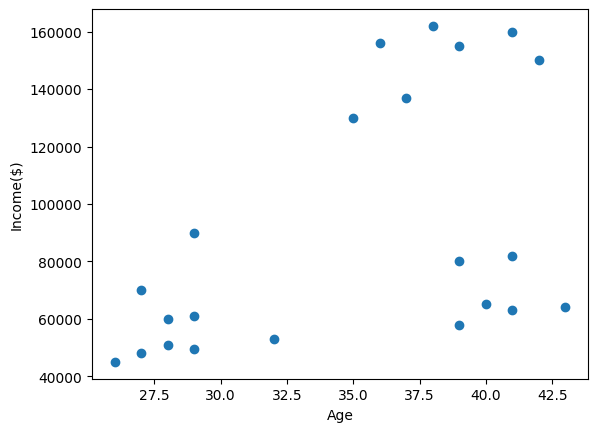

<Figure size 700x700 with 0 Axes>

In [43]:
x = df['Age']
y = df['Income($)']

plt.xlabel("Age")
plt.ylabel("Income($)")
plt.scatter(x,y)
plt.figure(figsize=(7,7))

KMeans

[2 2 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 1]
[[3.82857143e+01 1.50000000e+05]
 [3.29090909e+01 5.61363636e+04]
 [3.40000000e+01 8.05000000e+04]]
        Name  Age  Income($)  Cluster
2      Mohan   29      61000        1
3     Ismail   28      60000        1
11       Tom   26      45000        1
12    Arnold   27      48000        1
13     Jared   28      51000        1
14     Stark   29      49500        1
15    Ranbir   32      53000        1
16    Dipika   40      65000        1
17  Priyanka   41      63000        1
18      Nick   43      64000        1
21     Abdul   39      58000        1


<Figure size 700x700 with 0 Axes>

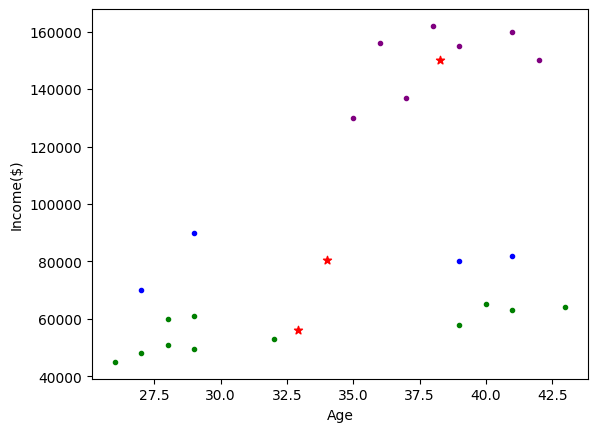

<Figure size 700x700 with 0 Axes>

In [44]:
from sklearn.cluster import KMeans

#Default number of Iteration is 300 ....... can be changed using max_iter
km = KMeans(n_clusters=3, max_iter=400)
km.fit(df[['Age', 'Income($)']])

cluster_predicted = km.predict(df[['Age', 'Income($)']])
print(cluster_predicted)

df['Cluster'] = cluster_predicted 
#print(df.head())

centroids = km.cluster_centers_

print(centroids)

#Plotting 
c1 = df[df.Cluster == 0]
c2 = df[df.Cluster == 1]
c3 = df[df.Cluster == 2]
print(c2)
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(c1['Age'], c1['Income($)'], color='purple', marker='.')
plt.scatter(c2['Age'], c2['Income($)'], color='green', marker='.')
plt.scatter(c3['Age'], c3['Income($)'], color='blue', marker='.')

plt.scatter(centroids[:,0], centroids[:,1], marker='*', color='red')
plt.figure(figsize=(7,7))


In above we are getting wrong results as the scalling is not done correctly so we use Min Max Scaler 
<br><br>
Hence we again use Kmeans clustering after scalling the data using Min Max Scaller


[[0.1372549  0.11633428]
 [0.72268908 0.8974359 ]
 [0.85294118 0.2022792 ]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


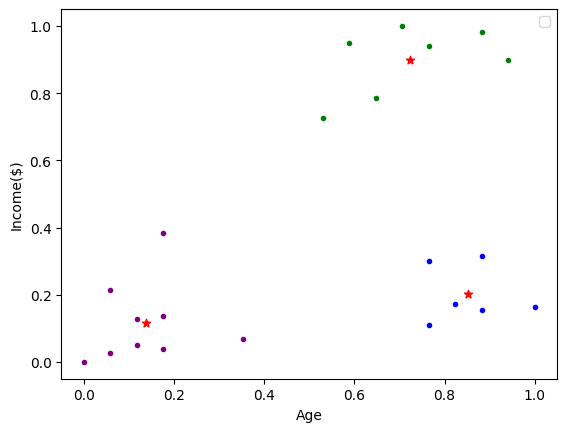

In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

#df['Income($)'] = scaler.fit_transform(df[['Income($)]])

df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

km = KMeans(n_clusters=3)
km.fit(df[['Age', 'Income($)']])
cluster_predicted = km.predict(df[['Age', 'Income($)']])

df['Cluster'] = cluster_predicted
#print(df.head())

#Plotting 

c1 = df[df['Cluster']==0]
c2 = df[df['Cluster']==1]
c3 = df[df['Cluster']==2]

centroids = km.cluster_centers_
print(centroids)

plt.scatter(c1['Age'], c1['Income($)'], marker='.', color='purple')
plt.scatter(c2['Age'], c2['Income($)'], marker='.', color='green')
plt.scatter(c3['Age'], c3['Income($)'], marker='.', color='blue')
plt.scatter(centroids[:,0], centroids[:,1], marker='*', color='red')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

Elbow Plot

[5.434011511988178, 2.0911363886990775, 0.4750783498553096, 0.42015522057314425, 0.32287355046353067, 0.2522119125653639, 0.184278684552248, 0.13706529523670868, 0.14889330146036145]
Therefore Optimal Value of k: 3


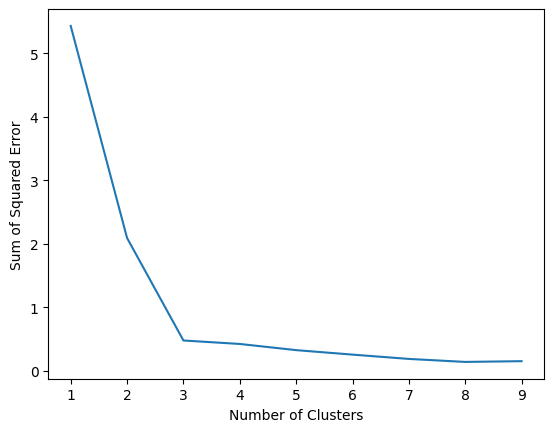

In [61]:
sse = []
k_range = range(1,10)

for i in k_range:
    km = KMeans(n_clusters=i)
    km.fit(df[['Age', "Income($)"]])
    sse.append(km.inertia_)

print(sse)

#Plotting 
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range, sse)

print("Therefore Optimal Value of k: 3")